In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

# 1.0 Uppvärmning

Done!

# 1.1 Movielens full - EDA

In [2]:
movies, ratings = pd.read_csv('../data/movies.csv'), pd.read_csv('../data/ratings.csv')

### a.1) Movies EDA

In [3]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [4]:
movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

In [5]:
movies.genres.nunique()

951

In [6]:
movies.title.nunique()

9737

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies['year']  = movies['title'].str.extract(r'\((\d{4})\)')

movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [9]:
genres_df = movies['genres'].str.get_dummies('|')

# calculate the most common genres for each movie
movies['most_common_genre'] = genres_df.apply(lambda x: x.idxmax(), axis=1)

# show the resulting DataFrame
movies

,movieId,title,genres,year,most_common_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Comedy
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,Action
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,Animation
9739,193585,Flint (2017),Drama,2017,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,Action


In [10]:
common_genres = movies.groupby('most_common_genre').agg({'title':'count'}).reset_index()

common_genres

,most_common_genre,title
0,(no genres listed),34
1,Action,1828
2,Adventure,653
3,Animation,298
4,Children,197
5,Comedy,2779
6,Crime,537
7,Documentary,386
8,Drama,2226
9,Fantasy,42


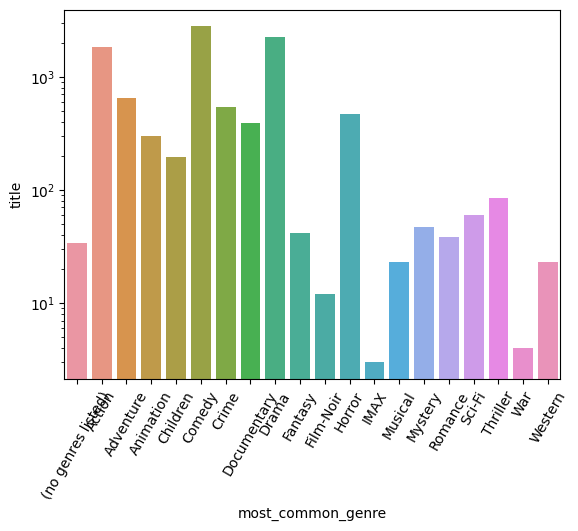

In [11]:
fig = plt.subplot()


sns.barplot(data=common_genres, x='most_common_genre', y='title')

plt.xticks(rotation= 60)
fig.set_yscale('log')



In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movieId            9742 non-null   int64 
 1   title              9742 non-null   object
 2   genres             9742 non-null   object
 3   year               9729 non-null   object
 4   most_common_genre  9742 non-null   object
dtypes: int64(1), object(4)
memory usage: 380.7+ KB


In [13]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,9742.0,42200.353623,52160.494854,1.0,3248.25,7300.0,76232.0,193609.0


<Axes: >

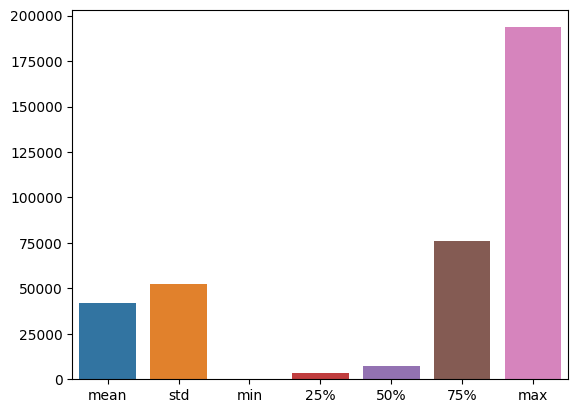

In [14]:
movies_description = movies.describe().T.drop('count', axis=1)
columns = movies_description.columns

sns.barplot(data=movies_description)


### a.2) Ratings EDA

In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [17]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


In [18]:
ratings['userId'].value_counts

<bound method IndexOpsMixin.value_counts of 0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64>

In [19]:
userId_df = ratings.groupby('userId').agg({'movieId':'count', 'rating':'count'}).reset_index()
userId_df

,userId,movieId,rating
0,1,232,232
1,2,29,29
2,3,39,39
3,4,216,216
4,5,44,44
...,...,...,...
605,606,1115,1115
606,607,187,187
607,608,831,831
608,609,37,37


<Axes: xlabel='userId', ylabel='movieId'>

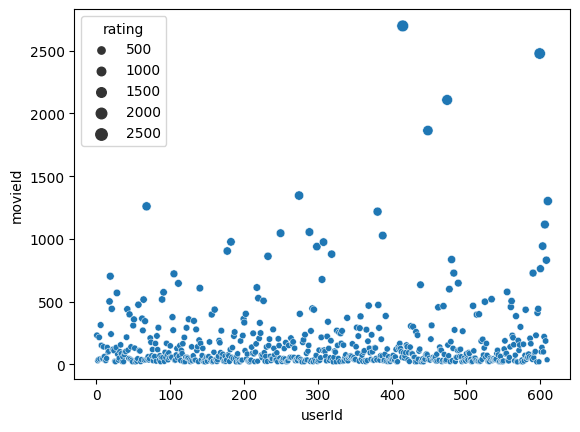

In [20]:
sns.scatterplot(data=userId_df, x="userId", y="movieId", size='rating')

In [21]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [22]:
rating_df = ratings.groupby('rating').agg({'movieId':'count', 'userId':'count'}).reset_index()
rating_df

,rating,movieId,userId
0,0.5,1370,1370
1,1.0,2811,2811
2,1.5,1791,1791
3,2.0,7551,7551
4,2.5,5550,5550
5,3.0,20047,20047
6,3.5,13136,13136
7,4.0,26818,26818
8,4.5,8551,8551
9,5.0,13211,13211


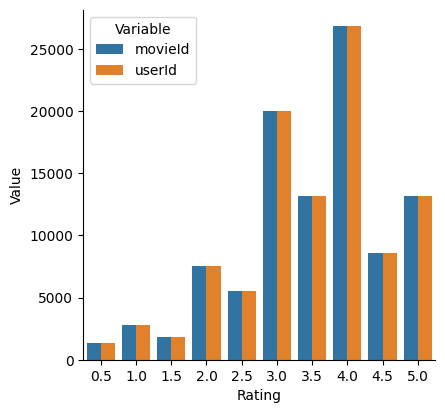

In [23]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
rating_df_melted = rating_df.melt(id_vars='rating').rename(columns=str.title)
columns = ['movieId','userId']

sns.barplot(x='Rating', y='Value', hue='Variable', data=rating_df_melted, ax=ax1)
sns.despine(fig)


---

## b.) Vilka är de 10 filmerna med flest ratings?

In [24]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [69]:
most_movie_ratings = ratings.groupby('movieId').agg({'rating':'sum'}).reset_index().sort_values(by='rating', ascending=False)
most_movie_ratings.head()

,movieId,rating
277,318,1404.0
314,356,1370.0
257,296,1288.5
1938,2571,1165.5
510,593,1161.0


In [26]:
top10_most_movie_ratings = most_movie_ratings.head(10)
top10_most_movie_ratings

,movieId,rating
277,318,1404.0
314,356,1370.0
257,296,1288.5
1938,2571,1165.5
510,593,1161.0
224,260,1062.0
97,110,955.5
2224,2959,931.5
461,527,929.5
418,480,892.5


In [27]:
top10_movie_id = top10_most_movie_ratings['movieId'].to_numpy()
top10_movie_id

array([ 318,  356,  296, 2571,  593,  260,  110, 2959,  527,  480])

In [28]:
movies.head()

,movieId,title,genres,year,most_common_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Comedy


In [29]:
result = movies[movies['movieId'].isin(top10_movie_id)]

In [30]:
result

,movieId,title,genres,year,most_common_genre
97,110,Braveheart (1995),Action|Drama|War,1995,Action
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977,Action
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,Comedy
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1994,Crime
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994,Comedy
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993,Action
461,527,Schindler's List (1993),Drama|War,1993,Drama
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991,Crime
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999,Action
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1999,Action


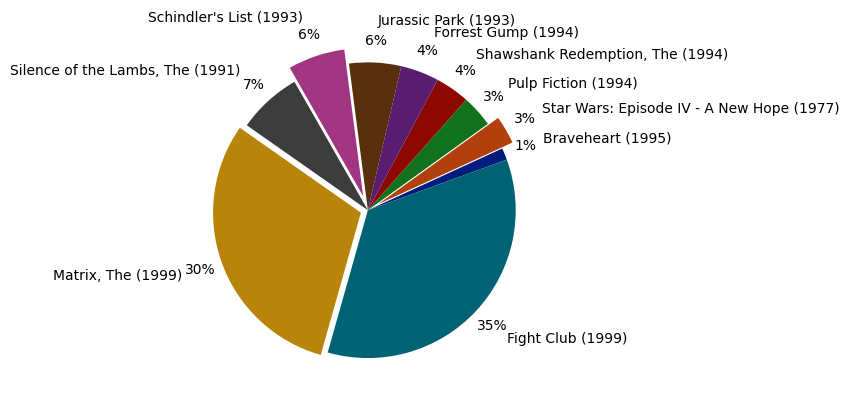

In [31]:
pallete_color = sns.color_palette('dark')
explode = [0, 0.08, 0, 0, 0,0, 0.1, 0, 0.05, 0]

plt.pie(data=result, x='movieId', labels='title', colors=pallete_color, explode=explode,autopct='%.00f%%', startangle=20,pctdistance=1.15, labeldistance=1.28);

---

## 1.) Average rating for the top 10 movies

In [32]:
mean_top_10_movie_ratings = ratings[ratings['movieId'].isin(top10_movie_id)]
mean_top_10_movie_ratings

,userId,movieId,rating,timestamp
7,1,110,4.0,964982176
15,1,260,5.0,964981680
16,1,296,3.0,964982967
20,1,356,4.0,964980962
26,1,480,4.0,964982346
...,...,...,...,...
99569,610,480,5.0,1479545821
99571,610,527,3.5,1479545826
99575,610,593,4.5,1479545819
99684,610,2571,5.0,1479545822


In [33]:
mean_top_10_movie_ratings = mean_top_10_movie_ratings.groupby('movieId').agg({'rating':'mean'}).reset_index()
mean_top_10_movie_ratings= mean_top_10_movie_ratings.rename(columns={'rating':'mean_rating'})
mean_top_10_movie_ratings

,movieId,mean_rating
0,110,4.031646
1,260,4.231076
2,296,4.197068
3,318,4.429022
4,356,4.164134
5,480,3.750000
6,527,4.225000
7,593,4.161290
8,2571,4.192446
9,2959,4.272936


In [34]:
result

,movieId,title,genres,year,most_common_genre
97,110,Braveheart (1995),Action|Drama|War,1995,Action
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977,Action
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,Comedy
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1994,Crime
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994,Comedy
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993,Action
461,527,Schindler's List (1993),Drama|War,1993,Drama
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991,Crime
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999,Action
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1999,Action


In [35]:
mean_top = pd.merge(result, mean_top_10_movie_ratings, on='movieId', how='outer')

In [41]:
fig = px.bar(mean_top, x='title', y='mean_rating', title='mean rating for top 10 rated movies', color='most_common_genre')
fig.show()

---

## 1.d 

In [42]:
movies

,movieId,title,genres,year,most_common_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Comedy
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,Action
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,Animation
9739,193585,Flint (2017),Drama,2017,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,Action


In [45]:
movies_by_year = movies.groupby('year').agg({'title':'count'}).reset_index()
movies_by_year

,year,title
0,1902,1
1,1903,1
2,1908,1
3,1915,1
4,1916,4
...,...,...
101,2014,278
102,2015,274
103,2016,218
104,2017,147


In [65]:
# some inspiration drawn from here
# https://www.geeksforgeeks.org/how-to-make-range-slider-and-selector-in-plotly/
import plotly.graph_objects as go
import plotly_express as px

plot = go.Figure(data=[go.Bar(x=movies_by_year["year"], y=movies_by_year["title"])])

plot.update_layout(
    xaxis = dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, step="year", stepmode="backward"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        title='Year'
    ),
    yaxis = dict(
        range=[0, 400],
        title='Movie count'
        ),
    title='Total amount of movies per year over time'
)

plot.show()


---

## 1.e

In [67]:
rating_df

,rating,movieId,userId
0,0.5,1370,1370
1,1.0,2811,2811
2,1.5,1791,1791
3,2.0,7551,7551
4,2.5,5550,5550
5,3.0,20047,20047
6,3.5,13136,13136
7,4.0,26818,26818
8,4.5,8551,8551
9,5.0,13211,13211


Text(0, 0.5, 'Count')

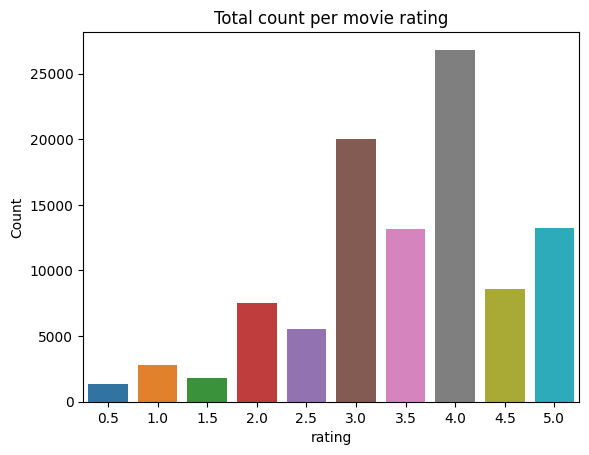

In [74]:
sns.barplot(data=rating_df, x='rating', y='movieId')
plt.title('Total count per movie rating')
plt.ylabel('Count')

---

In [37]:
movie_users = ratings.pivot(index='movieId', columns='userId', values='rating')
movie_users = movie_users.apply(lambda x: x.fillna(x.mean()), axis=1)
movie_users

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,3.920930,3.920930,3.920930,4.000000,3.92093,4.500000,3.920930,3.920930,3.920930,...,4.000000,3.920930,4.000000,3.000000,4.000000,2.500000,4.000000,2.500000,3.000000,5.000000
2,3.431818,3.431818,3.431818,3.431818,3.431818,4.00000,3.431818,4.000000,3.431818,3.431818,...,3.431818,4.000000,3.431818,5.000000,3.500000,3.431818,3.431818,2.000000,3.431818,3.431818
3,4.000000,3.259615,3.259615,3.259615,3.259615,5.00000,3.259615,3.259615,3.259615,3.259615,...,3.259615,3.259615,3.259615,3.259615,3.259615,3.259615,3.259615,2.000000,3.259615,3.259615
4,2.357143,2.357143,2.357143,2.357143,2.357143,3.00000,2.357143,2.357143,2.357143,2.357143,...,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143,2.357143
5,3.071429,3.071429,3.071429,3.071429,3.071429,5.00000,3.071429,3.071429,3.071429,3.071429,...,3.071429,3.071429,3.071429,3.000000,3.071429,3.071429,3.071429,3.071429,3.071429,3.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
193583,3.500000,3.500000,3.500000,3.500000,3.500000,3.50000,3.500000,3.500000,3.500000,3.500000,...,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
193585,3.500000,3.500000,3.500000,3.500000,3.500000,3.50000,3.500000,3.500000,3.500000,3.500000,...,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
